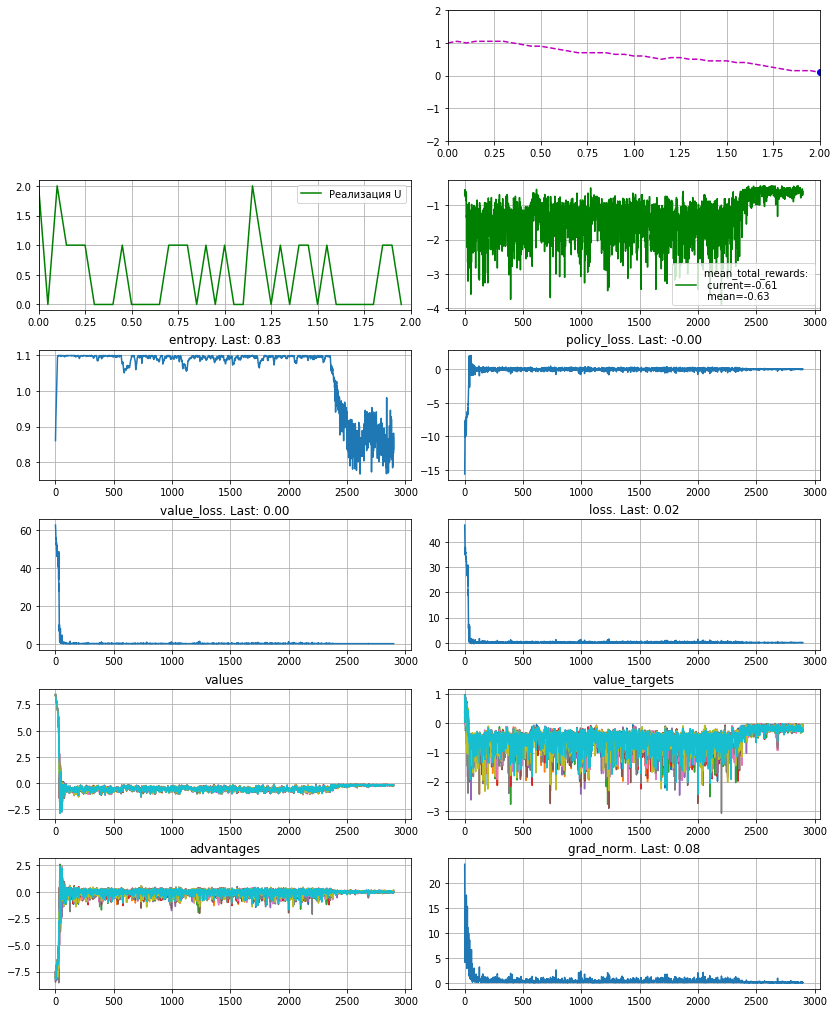

/home/heafer/src/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4811: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = asanyarray(arr)
/home/heafer/src/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4811: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(arr)
<__array_function__ internals>:5: FutureWarning: The input object 

In [7]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.DiscreteActorCritic import DiscreteActorCritic
from Agents.PPO import PPO_Discrete
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import  ContinuousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver
%load_ext autoreload
%autoreload 2


#environment initialization
env = SimpleControlProblem()
action_n = 3
action_values = np.linspace(env.action_min, env.action_max, num=action_n)

#agent initialization
# pi_model = SequentialNetwork([env.state_dim, 128, action_n], nn.ReLU())
# v_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
ac = DiscreteActorCritic(env.state_dim, action_n, 16)
PPO = ContinuousAgentMaker(PPO_Discrete)
agent = PPO(
    ac,
    # pi_model,
    # v_model,
    action_values=action_values,
    batch_size=10,
    epochs=5,
    clip_epsilon=.05,
    entropy_bonus_coefficient=-.01
)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=100)
solver.go(
    env,
    agent,
    episode_n=3000,
    show=visualizer.show,
    session_len=41,
    session_n=1,
    agent_learning='by_sessions',
    use_additional_info_in_sessions=True
)
